<a href="https://colab.research.google.com/github/salmanromeo/MAE_3403_Computer_Methods_in_Analysis_and_Design/blob/main/lecture_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Least Square Regression**

#####This code performs a linear regression using the least squares method. It:
*   generates some sample data
*   defines a linear model function
\begin{align}
  y = ax+b
    \end{align}
*   defines an objective function that calculates the sum of squared errors between the model's predictions and the actual data.
*   then uses the scipy.optimize.minimize function to find the parameters that minimize the objective function (i.e., the optimal values of the slope and intercept of the line that best fits the data)

#####Finally, it plots the data and the fitted line using the optimal parameters.


![picture](https://drive.google.com/uc?export=view&id=1T4fglPxCWWKA2Z-bhmEClMiea15jOEmj)

**Ordinary Least Square (OLS) Method**

\begin{align}
  \text{slope} = \sum_{i=1}^n \frac{(x-\bar{x})(y-\bar{y})}{(x-\bar{x})^2} \\[1em]
  \text{Intercept} = \bar{y} - \text{slope} * \bar{x}
    \end{align}

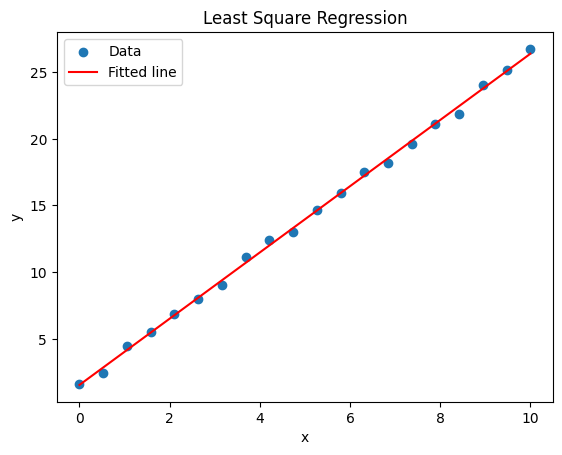

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(0, 10, 20)
y = 2.5 * x + 1.5 + np.random.randn(20) * 0.3    # linear (scales the random noise by a factor of 0.3)

# Compute the slope and y-intercept using the least squares formula
slope = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
y_intercept = np.mean(y) - slope * np.mean(x)

# Define the linear model function using the slope and y-intercept
def linear_model(x, slope, y_intercept):
    return slope * x + y_intercept

# Plot the data and the fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, linear_model(x, slope, y_intercept), color='red', label='Fitted line')
plt.title('Least Square Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Direct Inverse Method (Matrix Form)**

#####Theorem Let $A$ be an $m x n$ matrix and let $b$ be a vector in $R^m$. The following are equivalent:
1.   $Ax = b$ has a unique least-squares solution.
2.   The columns of $A$ are linearly independent.
1.   $A^TA$ is invertible.

#####In this case, the least-squares solution is
\begin{align}
  \bar{x} = (A^TA)^{-1}A^Tb
    \end{align}
#####We can write
\begin{align}
  y = ax+b
    \end{align}
#####Matrix form as:
\begin{align}
  Y = AX
    \end{align}
#####where $A$ is a matrix, $X$ is our vector of model unknown parameters and $Y$ is vecotr of data.

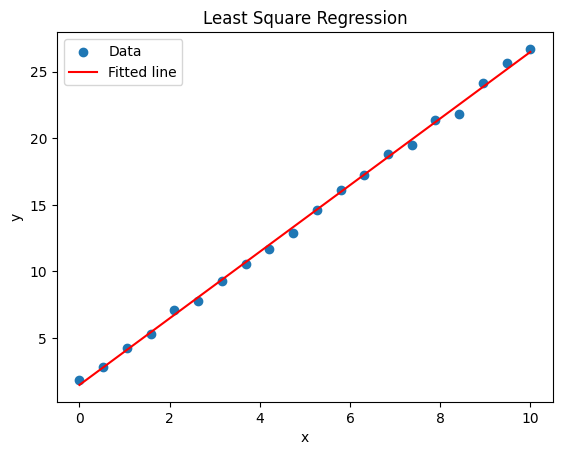

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(0, 10, 20)
y = 2.5 * x + 1.5 + np.random.randn(20) * 0.3    # linear (scales the random noise by a factor of 0.3)

# Build the design matrix
X = np.vstack((x, np.ones(len(x)))).T

# Solve the least squares problem
w = np.linalg.inv(X.T @ X) @ X.T @ y

# Extract the optimal parameters
a_opt, b_opt = w

# Plot the data and the fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, a_opt * x + b_opt, color='red', label='Fitted line')
plt.title('Least Square Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Using *scipy.optimize.minimize* Package**

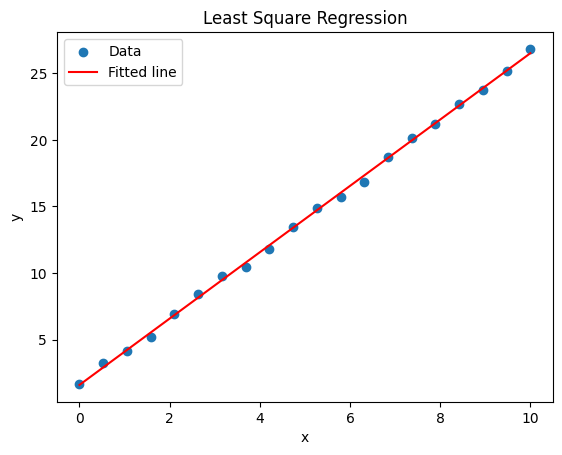

In [103]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(0, 10, 20)
y = 2.5 * x + 1.5 + np.random.randn(20) * 0.3    # linear (scales the random noise by a factor of 0.3)

# Define the model function
def linear_model(x, a, b):
    return a * x + b

# Define the objective function (least squares)
def objective(params):
    a, b = params
    return np.sum((y - linear_model(x, a, b)) ** 2)

# Find the optimal parameters using least squares
from scipy.optimize import minimize

result = minimize(objective, [0, 0])
a_opt, b_opt = result.x

# Plot the data and the fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, linear_model(x, a_opt, b_opt), color='red', label='Fitted line')
plt.title('Least Square Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**2. Gaussian Process Regression**

#####This code performs a regression using Gaussian process regression. It: 
*   generates some sample data
*   defines an radial basis function (RBF) kernel function
*   creates a GaussianProcessRegressor object with the specified kernel and other hyperparameters
*   then fits the model to the data
*   generates new data to make predictions
*   uses the predict method to make predictions with the model on the new data
#####Finally, it plots the data, the fitted curve, and the uncertainty bounds (represented by the standard deviation of the predicted values).

**Using Bayes’ Rule**

Calculating posterior distribution with Bayes’ Rule:
\begin{align}
p(w\mid y,X) = \frac{p(y \mid X, w) \, p(w)}{p(y \mid X)} \\[1em]
\text{posterior} = \frac{\text{likelihood} * \text{prior}}{\text{marginal likelihood}}
\end{align}
Calculating predictive distribution, $f^*$ is prediction label, $x^*$ is test observation:
\begin{align}
p(f^*\mid x^*,y,X) = \int p(f^*\mid x^*,w) p(w \mid y,X)dw
\end{align}
#####In Gaussian process regression (GPR), we first assume a Gaussian process prior, which can be specified using a mean function, $m(x)$, and covariance function, $k(x, x’)$:
\begin{align}
f(x) \sim GP(m(x),k(x, x’))
\end{align}
#####A popular kernel is the composition of the constant kernel with the radial basis function (RBF) kernel, which encodes for smoothness of functions:
\begin{align}
k(x, x’) = {σ_f}^2 e^{-\frac{1}{2l^2}{\mid\mid {x-x'}\mid\mid}^2}
\end{align}
#####This kernel has two hyperparameters: signal variance, $σ^²$, and lengthscale, $l$.
#####To calculate the predictive posterior distribution, the data and the test observation is conditioned out of the posterior distribution. Again, because we chose a Gaussian process prior, calculating the predictive distribution is tractable, and leads to normal distribution that can be completely described by the mean and covariance.
\begin{align}
f^*\mid X,y,X^* \sim 𝒩(\bar{f^*},∑^*) \\[1em]
\bar{f^*}=μ^*+K(X^*, X)[K(X,X)+{σ_n}^2I]^{-1}(y-μ) \\[1em]
∑^*=K(X^*, X^*) - K(X^*, X)[K(X,X)+{σ_n}^2I]^{-1}K(X, X^*)
\end{align} 

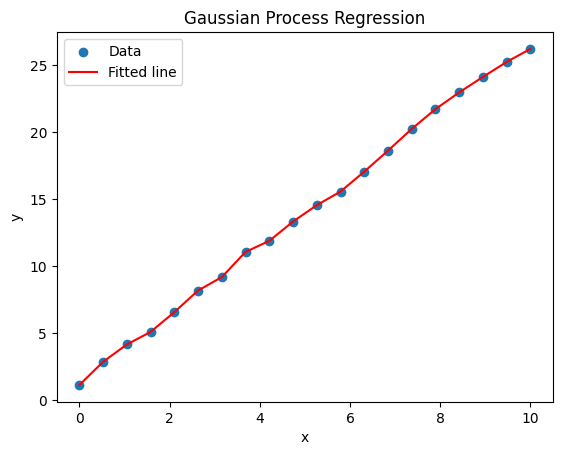

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
x = np.linspace(0, 10, 20)
y = 2.5 * x + 1.5 + np.random.randn(20) * 0.3    # linear (scales the random noise by a factor of 0.3)

# Define the kernel function
def squared_exponential_kernel(x1, x2, length_scale, variance):
    return variance * np.exp(-0.5 * np.linalg.norm(x1 - x2) ** 2 / length_scale ** 2)

# Define the prior mean and covariance functions
def prior(x):
    return np.zeros_like(x)

def covariance(x1, x2, length_scale, variance):
    return squared_exponential_kernel(x1, x2, length_scale, variance)

# Define the likelihood function
def likelihood(y, y_pred, noise_var):
    n = len(y)
    return np.exp(-0.5 * np.sum((y - y_pred) ** 2) / noise_var ** 2) / (np.sqrt(2 * np.pi) * noise_var) ** n

# Define the posterior mean and covariance functions
def posterior(x, y, x_new, length_scale, variance, noise_var):
    n = len(x)
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = covariance(x[i], x[j], length_scale, variance)
    K_inv = np.linalg.inv(K + noise_var * np.eye(n))
    k_star = np.zeros(n)
    for i in range(n):
        k_star[i] = covariance(x[i], x_new, length_scale, variance)
    mu = prior(x_new) + k_star.dot(K_inv).dot(y - prior(x))
    cov = covariance(x_new, x_new, length_scale, variance) - k_star.dot(K_inv).dot(k_star)
    return mu, cov

# Set hyperparameters
length_scale = 1.0
variance = 1.0
noise_var = 0

# Generate new data to make predictions
x_new = np.linspace(0, 10, 20)

# Calculate the posterior mean and covariance for each point
mu = np.zeros(len(x_new))
cov = np.zeros((len(x_new), len(x_new)))
for i in range(len(x_new)):
    mu[i], cov[i,:] = posterior(x, y, x_new[i], length_scale, variance, noise_var)

# Sample from the posterior distribution to get the predicted values
y_pred = np.random.multivariate_normal(mu, cov)

# Plot the data and the predicted values
plt.scatter(x, y, label='Data')
plt.plot(x_new, y_pred, color='red', label='Fitted line')
plt.title('Gaussian Process Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Using *sklearn.gaussian_process.GaussianProcessRegressor* and *sklearn.gaussian_process.kernels.RBF* Package**

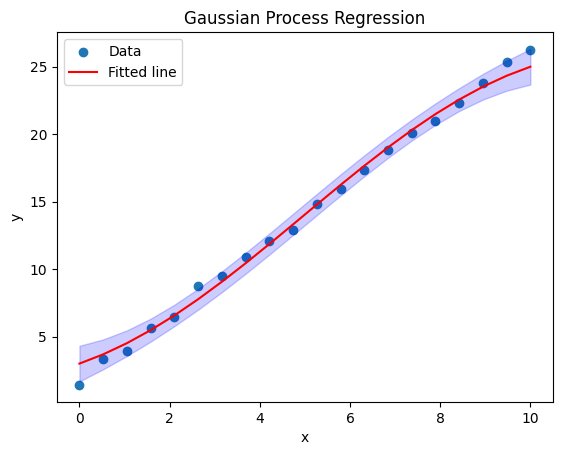

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Generate data
x = np.linspace(0, 10, 20).reshape(-1, 1)
y = 2.5 * x + 1.5 + np.random.randn(20, 1) * 0.3   # (scales the random noise by a factor of 0.3)

# Define the kernel function
kernel = RBF(length_scale=1.0)     # controls the smoothness of the function

# Create the Gaussian Process Regression object
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.1, normalize_y=True)  # helps to regularize the model and prevent overfitting

# Fit the model to the data
gp.fit(x, y)

# Generate new data to make predictions
x_new = np.linspace(0, 10, 20).reshape(-1, 1)

# Make predictions with the model
y_pred, std = gp.predict(x_new, return_std=True)

# Plot the data and the fitted curve with uncertainty bounds
plt.scatter(x, y, label='Data')
plt.plot(x_new, y_pred, color='red', label='Fitted line')
plt.fill_between(x_new.squeeze(), y_pred - std, y_pred + std, alpha=0.2, color='blue')
plt.title('Gaussian Process Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**3. Nonlinear Regression**

#####This code performs a regression using the curve_fit function from the scipy.optimize module.
*   generates some sample data
*   defines a nonlinear model function
*   uses the curve_fit function to find the parameters that best fit the data (i.e., the optimal values of the parameters a, b, and c that minimize the sum of squared errors between the model's predictions and the actual data)
*   Finally, it generates new data to make predictions
*   uses the optimal parameters to make predictions with the model on the new data
#####It plots the data and the fitted curve.

**Using *scipy.optimize.curve_fit* Package**

**Nonlinear model function**
\begin{align}
  y = ae^{-bx}+c
    \end{align}

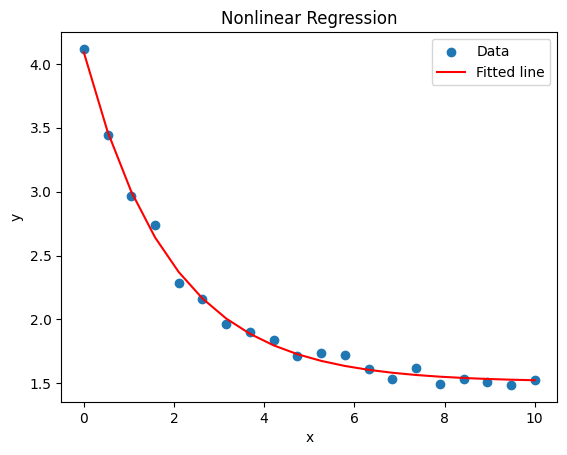

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate more data
x = np.linspace(0, 10, 20)
y = 2.5 * np.exp(-0.5 * x) + 1.5 + np.random.randn(20) * 0.05    # nonlinear ((scales the random noise by a factor of 0.05))

# Define the model function
def nonlinear_model(x, a, b, c):
    return a * np.exp(-b * x) + c

# Fit the model to the data
popt, pcov = curve_fit(nonlinear_model, x, y)

# Get the optimal parameters and the covariance matrix
a_opt, b_opt, c_opt = popt
cov = pcov.diagonal() ** 2

# Generate new data to make predictions
x_new = np.linspace(0, 10, 20)

# Make predictions with the model
y_pred = nonlinear_model(x_new, a_opt, b_opt, c_opt)

# Plot the data and the fitted curve
plt.scatter(x, y, label='Data')
plt.plot(x_new, y_pred, color='red', label='Fitted line')
plt.title('Nonlinear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Nonlinear model function (Parabolic/Quadratic Regression)**
\begin{align}
  y = ax^2+bx+c
    \end{align}

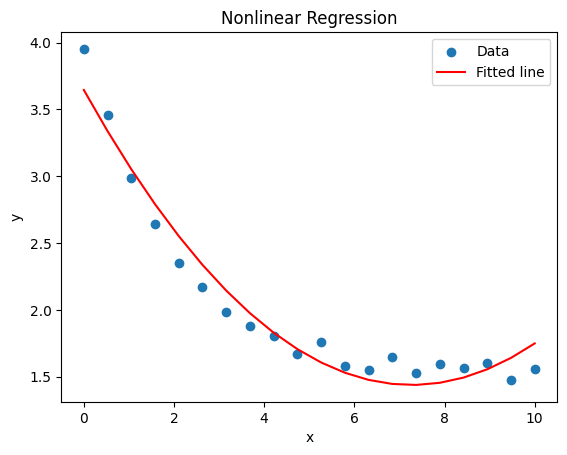

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate more data
x = np.linspace(0, 10, 20)
y = 2.5 * np.exp(-0.5 * x) + 1.5 + np.random.randn(20) * 0.05    # nonlinear ((scales the random noise by a factor of 0.05))

# Define the model function
def parabolic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the model to the data
popt, pcov = curve_fit(parabolic_model, x, y)

# Get the optimal parameters and the covariance matrix
a_opt, b_opt, c_opt = popt
cov = pcov.diagonal() ** 2

# Generate new data to make predictions
x_new = np.linspace(0, 10, 20)

# Make predictions with the model
y_pred = parabolic_model(x_new, a_opt, b_opt, c_opt)

# Plot the data and the fitted curve
plt.scatter(x, y, label='Data')
plt.plot(x_new, y_pred, color='red', label='Fitted line')
plt.title('Nonlinear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Nonlinear model function (Cubic Regression)**
\begin{align}
  y = ax^3+bx^2+cx+d
    \end{align}

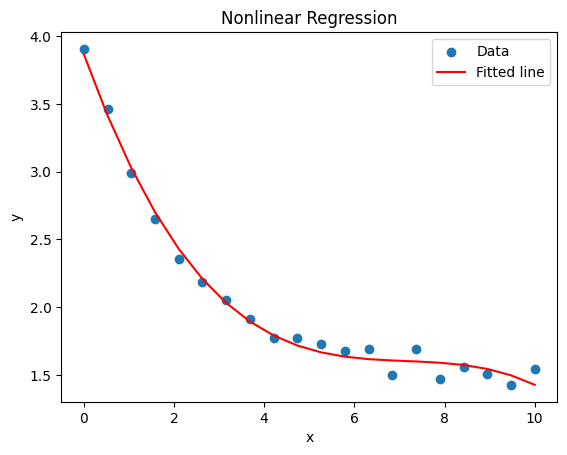

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate more data
x = np.linspace(0, 10, 20)
y = 2.5 * np.exp(-0.5 * x) + 1.5 + np.random.randn(20) * 0.05    # nonlinear ((scales the random noise by a factor of 0.1))

# Define the model function
def parabolic_model(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the model to the data
popt, pcov = curve_fit(parabolic_model, x, y)

# Get the optimal parameters and the covariance matrix
a_opt, b_opt, c_opt, d_opt = popt
cov = pcov.diagonal() ** 2

# Generate new data to make predictions
x_new = np.linspace(0, 10, 20)

# Make predictions with the model
y_pred = parabolic_model(x_new, a_opt, b_opt, c_opt, d_opt)

# Plot the data and the fitted curve
plt.scatter(x, y, label='Data')
plt.plot(x_new, y_pred, color='red', label='Fitted line')
plt.title('Nonlinear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
